In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from lmfit import models

## Opdracht 1.1


In [2]:
df = pd.read_csv('10-metingen.csv')
df

,x
0,73
1,79
2,69
3,74
4,68
5,72
6,72
7,75
8,60
9,76


In [3]:
mean = df['x'].mean()
std = df['x'].std()
stdmean = std / np.sqrt(len(df['x']))
print(f"{mean=} \n {std=} \n {stdmean=}")

mean=71.8 
 std=5.245103536738918 
 stdmean=1.6586473739499634


De juiste notatie voor de uitkomst van een volgende meting is $71.80 \pm 1.65$.

In [4]:
# Probability that the second mesurement is greater than 75:
from scipy import special
print((1 - special.erf((75-mean) / (stdmean * np.sqrt(2)))) / 2)

0.02684787630095853


## Opdracht 1.2



In [5]:
df = pd.read_csv('80-metingen.csv')
df

,y
0,90
1,90
2,79
3,84
4,78
...,...
75,22
76,28
77,36
78,39


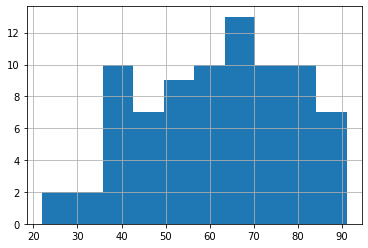

In [6]:
plt.hist(df['y'], bins=10)
plt.grid()

In [7]:
# Gaussian fitting
y, x = np.histogram(df['y'])
# Now, x is an array of bin edges, we want to know bin centers.
x = 0.5*(x[1:] + x[:-1])

gmodel = models.GaussianModel()
params = gmodel.guess(y, x=x)
results = gmodel.fit(y, params, x=x)
results

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

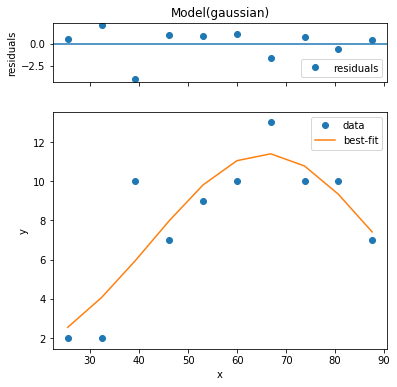

In [8]:
results.plot()

De de fit lijkt redelijk gelukt te zijn, al is de $\chi^2$ nogsteeds vrij hoog. Ik zou de fit wel vertrouwen

# Opgave 1.3

$\sigma_0 \mapsto \sigma_0 \sqrt N$

In [21]:
diffs = np.array([2.43, 1.34, 0.84, 1.21, 0.92, 0.96, 0.89, 0.89, 0.94, 1.18])
mean, std, stdmean = np.mean(diffs), np.std(diffs), np.std(diffs) / np.sqrt(len(diffs))
print(f"{mean=} \n {std=} \n {stdmean=}")

mean=1.16 
 std=0.45192919799455317 
 stdmean=0.14291256067959876


In [27]:
# Using this data, we can calculate the nerve speed
# Automated error propagation & more
from data_analysis_tools import *

delta_t = floatE(mean, stdmean)
nerve_length = floatE(1.5, 0.15)
nerve_v = 17 * nerve_length / delta_t # 17 persons
print(nerve_v)

22.0 ± 3.5


## Opgave 1.4

In [10]:
df = pd.read_csv('verval.csv')
df

,tijd,counts
0,0,1265
1,1,688
2,2,410
3,3,241
4,4,132
5,5,93
6,6,41
7,7,29
8,8,30


In [11]:
bg = 12

def f(t, lamda, N0):
    return N0 * np.exp(-lamda * t) + bg

vmodel = models.Model(f)
result = vmodel.fit(df['counts'], t=df['tijd'], lamda=1, N0=1300, weights=1/ np.sqrt(df['counts']))
result

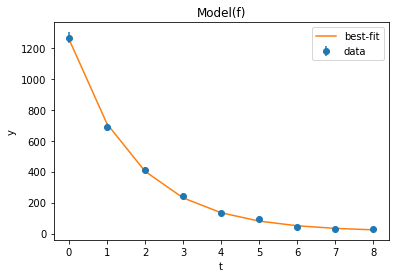

In [12]:
result.plot_fit()

In [13]:
lamda, dlamda = 0.5797010192694227, 0.0131
t12, dt12 = np.log(2) / lamda, dlamda * np.log(2)/ lamda**2
print(f"{t12=} \n {dt12=}")

t12=1.1956977088525649 
 dt12=0.027020204321374048


### $\tau_{1/2} = 1.196 \pm 0.027 \text{ h}$

# Casus 1: Biomechanica

In [14]:
df = pd.read_csv('squat.csv')
df

,stance width,impulse,error
0,0,161.170658,6.005381
1,10,171.565045,3.825325
2,20,171.038662,3.080887
3,30,175.302728,5.350336
4,40,193.371009,6.911534
5,50,177.071976,0.703771
6,60,188.268868,7.498550
7,70,184.368025,4.715182
8,80,170.993129,2.384634


In [15]:
# First, a fit of a constant line,
model1 = models.Model(lambda x, a: a)
result1 = model1.fit(df['impulse'], x=df['stance width'], weights=1 / df['error'], a=160)
result1

In [16]:
# Seond, a parabola,
model2 = models.Model(lambda x, a, b, c: a*(x-b)**2 + c)
result2 = model2.fit(df['impulse'], x=df['stance width'], weights=1 / df['error'], a=-1, b=50, c=190)
result2

We cannot draw a conclusion yet from the chi2 values.

In [17]:
# Adding better error uncertainties
df['sigma'] = np.sqrt(sum(df['error']**2) / 9)
df

,stance width,impulse,error,sigma
0,0,161.170658,6.005381,4.957911
1,10,171.565045,3.825325,4.957911
2,20,171.038662,3.080887,4.957911
3,30,175.302728,5.350336,4.957911
4,40,193.371009,6.911534,4.957911
5,50,177.071976,0.703771,4.957911
6,60,188.268868,7.498550,4.957911
7,70,184.368025,4.715182,4.957911
8,80,170.993129,2.384634,4.957911


In [18]:
# Re-analysing:
result1.fit(weights = 1 / df['sigma'])
result2.fit(weights = 1 / df['sigma'])
result1

In [19]:
result2

Optimal stance width is $49.8 \pm 5.5\ cm$.

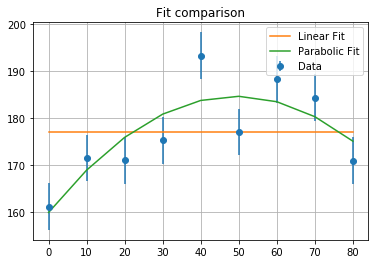

In [20]:
lin = lambda x, a: x* 0 + a
par = lambda x, a, b, c:lambda x, a, b, c: a*(x-b)**2 + c
xs = df['stance width']
ys = df['impulse']
plt.errorbar(xs, ys, df['sigma'], fmt='o', label='Data')
plt.plot(xs, [result1.eval() for x in xs], label='Linear Fit')
plt.plot(xs, result2.eval(), label='Parabolic Fit')
plt.legend()
plt.title('Fit comparison')
plt.grid()
plt.show()

## Casus 2: Röntgenfluorescentie

In [41]:
# We willen een gaussian fit doen van de x-ray data
df = pd.read_csv('X-ray.csv')
df

,energy,counts,error
0,0.058594,4.096653,0.943276
1,0.117188,4.115930,0.950058
2,0.175781,4.819358,0.956939
3,0.234375,4.155654,0.963920
4,0.292969,3.184677,0.971004
...,...,...,...
251,14.765625,4.328143,1.194617
252,14.824219,4.644998,1.183907
253,14.882812,4.157970,1.173388
254,14.941406,2.322101,1.163054


In [46]:
xs, ys, dys = [df[column] for column in df.columns]
gmodel = models.GaussianModel()

params = gmodel.guess(ys, x=xs)
fit_result = gmodel.fit(ys, params, x=xs, weights=1/dys)
fit_result

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

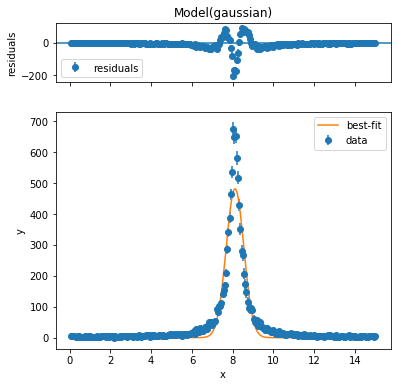

In [47]:
fit_result.plot()

This is still not looking too great, to me the graph looks more like a resonce curfe if anything. A reduce $\chi^2$ of 14 is terrible. However, not all is lost. We have determined the center energy with a great accuracy: $E = 8.115 \pm 0.018 \text{ k}eV$. There is little likelyhood there also exists another element.

In [86]:
# A second response, from a Ni-Fe mixture this time. 
df = pd.read_csv('X-ray-invar.csv')
xs, ys, dys = [df[column] for column in df.columns]

gmodel = models.GaussianModel(prefix='peak1') + models.GaussianModel(prefix='peak2')
p_values = [400, 6.3, 0.3, 300, 7.7, 0.3]
print(gmodel.param_names)
print({p_name:val for p_name, val in zip(gmodel.param_names, p_values)})
params = gmodel.make_params(**{p_name:val for p_name, val in zip(gmodel.param_names, p_values)})

result = gmodel.fit(ys, x=xs, params=params, weights=1/dys)
result


['peak1amplitude', 'peak1center', 'peak1sigma', 'peak2amplitude', 'peak2center', 'peak2sigma']
{'peak1amplitude': 400, 'peak1center': 6.3, 'peak1sigma': 0.3, 'peak2amplitude': 300, 'peak2center': 7.7, 'peak2sigma': 0.3}


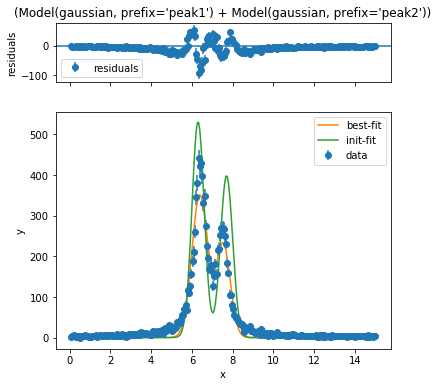

In [87]:
result.plot()
# plt.plot(xs, result.init_fit, label='init-fit')
# plt.legend()

In [88]:
print(result.best_values)

{'peak2amplitude': 198.34075016600855, 'peak2center': 7.536055102048086, 'peak2sigma': 0.3456363652709793, 'peak1amplitude': 342.20235572218587, 'peak1center': 6.385334769325277, 'peak1sigma': 0.38953007306926657}


Er is een piek bij 6.3 en bij 7.4 eV. Dit komt precies overeen met de tabel. De pieken hiervan hebben hoogtes van 342 en 198 counts. Dat komt neer op 63.3 en 36.7 procent. Dit ligt erg dicht bij de gegeven waardes.

In [103]:
from scipy import stats
prob = stats.chi2.sf(results.redchi, 250)
norm = stats.norm.ppf(prob)
print(f"{result.redchi=} \n {result.ndata=} \n {prob=} \n {norm=}")

result.redchi=11.21989976505407 
 result.ndata=256 
 prob=1.0 
 norm=inf
